# Challenge:

Build a Model: Use the provided training set to create a model.

Make Predictions: Use your model to predict the target variable, Kiss_index, for the test set.

In [486]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

print("Importing libraries... Done!")

Importing libraries... Done!


In [487]:
df_org = pd.read_csv(r'/Users/mexmex/Documents/3-Math_LU/HT2025/BERN02/BERNO2-kissing-challenge-2025/Data/train.csv')
df_org.head()

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
0,6089360076,2,1.0,42.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.917
1,6191773043,2,1.0,27.0,Norway,France,NaN,NaN,NaN,NaN,...,274.708499,-1.490820,-13.601394,10.961671,1132.641854,10.326206,12.461674,2.539051,24.367000,0.990
2,6180369987,2,1.0,28.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.078
3,6157791024,2,3.0,22.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,1.000
4,6174818440,2,1.0,23.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.451


In [488]:
df = df_org.copy()
df

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
0,6089360076,2,1.0,42.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.917
1,6191773043,2,1.0,27.0,Norway,France,NaN,NaN,NaN,NaN,...,274.708499,-1.490820,-13.601394,10.961671,1132.641854,10.326206,12.461674,2.539051,24.367000,0.990
2,6180369987,2,1.0,28.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.078
3,6157791024,2,3.0,22.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,1.000
4,6174818440,2,1.0,23.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,6419278552,2,1.0,37.0,Italy,Italy,0.160000,38000.0,31.9,0.93,...,27.966190,12.606023,-0.070636,26.458223,952.994164,27.966190,12.606023,-0.070636,26.458223,1.000
1402,6108329833,2,3.0,23.0,United Kingdom of Great Britain and Northern I...,Ireland,NaN,NaN,NaN,NaN,...,1.168566,9.187962,1.301625,18.040345,1271.513714,0.000000,9.644015,2.587659,18.070075,0.780
1403,6093625590,1,2.0,42.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.460
1404,6420680047,2,1.0,28.0,Italy,Germany,NaN,NaN,NaN,NaN,...,27.966190,12.606023,-0.070636,26.458223,837.165363,30.629372,8.964064,-2.221096,22.129606,0.987


In [489]:
df['Country_Res'].unique()

array(['United Kingdom of Great Britain and Northern Ireland', 'Norway',
       'Germany', 'Colombia', 'Italy', 'Poland', 'France', 'Brazil',
       'Nigeria', 'Chile', 'Australia', 'India', 'Czechia', 'Bulgaria',
       'Sweden', 'Canada', 'Estonia', 'New Zealand', 'Singapore',
       'Philippines', 'United States of America', 'Argentina', 'Thailand',
       'Ecuador', 'Netherlands', 'Finland', 'United Arab Emirates',
       'Kosovo', 'Greece', 'Spain', 'Ireland', 'Switzerland', 'Turkey',
       'Austria', 'Belgium', 'Bosnia and Herzegovina',
       'Venezuela (Bolivarian Republic of)', 'Serbia', 'China', 'Hungary',
       'Malaysia', 'Russian Federation', 'Portugal', 'Croatia',
       'Dominican Republic', 'Taiwan, Province of China', nan, 'Denmark'],
      dtype=object)

In [490]:
df['Country_Born'].unique()

array(['United Kingdom of Great Britain and Northern Ireland', 'France',
       'Germany', 'Colombia', 'Italy', 'Poland', 'Brazil', 'Nigeria',
       'Chile', 'Australia', 'India', 'Czechia', 'Bulgaria', 'Slovakia',
       'Sweden', 'Canada', 'Russian Federation', 'Spain', 'Albania',
       'Pakistan', 'Hungary', 'Singapore', 'Philippines',
       'United States of America', 'Paraguay', 'Ghana', 'Belgium',
       'Lithuania', 'Peru', 'Greece', 'Japan', 'South Africa',
       'Venezuela (Bolivarian Republic of)', 'Korea, Republic of',
       'Netherlands', 'Bosnia and Herzegovina', nan, 'China', 'Finland',
       'Kosovo', 'Ireland', 'Kyrgyzstan', 'Portugal', 'Switzerland',
       'Panama', 'Austria', 'Ecuador', 'Palestine, State of', 'Estonia',
       'Serbia', 'Norway', 'Cuba', 'Malaysia', 'Tajikistan', 'Croatia',
       'Zambia', 'Zimbabwe', 'Dominican Republic', 'Ukraine', 'Latvia',
       'Algeria', 'Iraq', 'Israel', 'Belarus', 'Uruguay', 'Kenya',
       'Viet Nam', 'Denmark', 'Rom

In [491]:
df.isna().sum()

ID                             0
Sex                            0
SexPref                        3
Age                            6
Country_Res                    1
Country_Born                   3
HPP_9                        252
GDP                          252
GINI                         252
SexRatio.2017est.            252
SexRatio.15.54.              252
UNRegion                     252
RelStatus                      9
RelLength                    351
RelY                         445
RelM                         526
Ethnicity                    242
SRA                            4
SRM                           98
SRH                            9
SRA_Partner                  215
SRM_Partner                  246
SRH_Partner                  217
Hug_Freq                       5
Sex_Freq                      30
Hug_Satis                      7
Sex_Satis                     41
GK_Breath                      6
GK_Scent                       6
GK_Taste                      19
GK_Wet    

In [492]:
df[df['HPP_9'].isna()]

# alot of national columns have na values, we will populate them

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
1,6191773043,2,1.0,27.0,Norway,France,NaN,NaN,NaN,NaN,...,274.708499,-1.490820,-13.601394,10.961671,1132.641854,10.326206,12.461674,2.539051,24.367000,0.990
32,6089763446,2,1.0,19.0,United Kingdom of Great Britain and Northern I...,Poland,NaN,NaN,NaN,NaN,...,1.168566,9.187962,1.301625,18.040345,644.540302,103.163716,8.308815,-4.302142,22.667001,0.420
40,6146813714,2,3.0,24.0,Bulgaria,Bulgaria,NaN,NaN,NaN,NaN,...,43.146049,10.932761,-4.073086,26.036237,671.262121,43.146049,10.932761,-4.073086,26.036237,0.500
42,6092621516,2,1.0,27.0,Germany,Colombia,NaN,NaN,NaN,NaN,...,30.629372,8.964064,-2.221096,22.129606,3112.519330,0.015868,23.630711,19.695370,28.764958,1.000
43,6338709703,2,1.0,27.0,Czechia,Slovakia,NaN,NaN,NaN,NaN,...,112.069257,8.052569,-4.884723,22.183244,784.244278,117.320756,8.117599,-6.443496,22.817699,0.644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,6211875372,2,1.0,30.0,Sweden,Sweden,NaN,NaN,NaN,NaN,...,197.606689,2.950454,-10.090172,17.941959,855.665814,197.606689,2.950454,-10.090172,17.941959,0.458
1394,6192221185,2,1.0,27.0,France,United States of America,NaN,NaN,NaN,NaN,...,10.326206,12.461674,2.539051,24.367000,864.592574,125.570596,7.395531,-9.079237,26.019328,0.218
1400,6191343086,2,1.0,29.0,Switzerland,France,NaN,NaN,NaN,NaN,...,148.418367,4.913953,-8.692608,18.516032,1132.641854,10.326206,12.461674,2.539051,24.367000,0.488
1402,6108329833,2,3.0,23.0,United Kingdom of Great Britain and Northern I...,Ireland,NaN,NaN,NaN,NaN,...,1.168566,9.187962,1.301625,18.040345,1271.513714,0.000000,9.644015,2.587659,18.070075,0.780


In [493]:
df['HPP_9'].unique()

array([-1.06333333,         nan, -0.87      ,  0.27      ,  0.16      ,
       -0.46      ,  0.93      ,  1.16      , -0.45      , -0.25      ,
        0.94      , -0.89      ])

In [494]:
df[df['Country_Res'] == 'United Kingdom of Great Britain and Northern Ireland']['HPP_9'].value_counts()
# for each country of residence, we will fill the na values with the most common value in that country
# it seems like it's same for same country of residence

HPP_9
-1.063333    441
Name: count, dtype: int64

In [495]:
df[df['Country_Res'] == 'Norway'].isna().sum()
# it seems like for Norway residents, HPP_9 is always na, same goes for GDP, GINI, SexRatio.2017ests, SexRatio.15.54, UNRegion

ID                           0
Sex                          0
SexPref                      1
Age                          0
Country_Res                  0
Country_Born                 0
HPP_9                        5
GDP                          5
GINI                         5
SexRatio.2017est.            5
SexRatio.15.54.              5
UNRegion                     5
RelStatus                    0
RelLength                    2
RelY                         2
RelM                         3
Ethnicity                    0
SRA                          0
SRM                          0
SRH                          1
SRA_Partner                  1
SRM_Partner                  1
SRH_Partner                  1
Hug_Freq                     0
Sex_Freq                     0
Hug_Satis                    0
Sex_Satis                    0
GK_Breath                    0
GK_Scent                     0
GK_Taste                     0
GK_Wet                       0
GK_Contact                   0
GK_Arous

In [496]:
df[df['Country_Res'] == 'Germany']

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
2,6180369987,2,1.0,28.0,Germany,Germany,-0.87,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.078
3,6157791024,2,3.0,22.0,Germany,Germany,-0.87,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,1.000
5,6179681318,2,1.0,23.0,Germany,Germany,-0.87,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.757
12,6180186997,2,1.0,47.0,Germany,Germany,-0.87,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.370
15,6093920916,1,1.0,23.0,Germany,Germany,-0.87,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,6181851673,2,1.0,25.0,Germany,Germany,-0.87,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.509
1323,6179707833,2,1.0,24.0,Germany,Germany,-0.87,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.997
1326,6179695574,2,1.0,25.0,Germany,Germany,-0.87,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.973
1352,6093145702,2,1.0,25.0,Germany,Germany,-0.87,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.483


In [497]:
df[(df['Country_Res'] != df['Country_Born']) & (df['HPP_9'].notna())]

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
602,6542833984,2,1.0,57.0,Italy,United States of America,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,864.592574,125.570596,7.395531,-9.079237,26.019328,0.800
688,6343438520,1,2.0,38.0,Nigeria,NaN,1.16,5900.0,48.8,0.00,...,0.00000,26.904945,18.504457,36.930674,NaN,NaN,NaN,NaN,NaN,0.933


In [498]:
df[df['Country_Res'] == 'Nigeria']

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
22,6401948870,2,1.0,38.0,Nigeria,Nigeria,1.16,5900.0,48.8,0.0,...,0.0,26.904945,18.504457,36.930674,1222.457237,0.0,26.904945,18.504457,36.930674,0.531
47,6402218241,2,1.0,30.0,Nigeria,Nigeria,1.16,5900.0,48.8,0.0,...,0.0,26.904945,18.504457,36.930674,1222.457237,0.0,26.904945,18.504457,36.930674,0.483
146,6343432745,1,4.0,37.0,Nigeria,Nigeria,1.16,5900.0,48.8,0.0,...,0.0,26.904945,18.504457,36.930674,1222.457237,0.0,26.904945,18.504457,36.930674,1.000
149,6401756744,2,1.0,45.0,Nigeria,Nigeria,1.16,5900.0,48.8,0.0,...,0.0,26.904945,18.504457,36.930674,1222.457237,0.0,26.904945,18.504457,36.930674,0.688
163,6401621281,2,1.0,26.0,Nigeria,Nigeria,1.16,5900.0,48.8,0.0,...,0.0,26.904945,18.504457,36.930674,1222.457237,0.0,26.904945,18.504457,36.930674,0.489
176,6402202013,2,1.0,27.0,Nigeria,Nigeria,1.16,5900.0,48.8,0.0,...,0.0,26.904945,18.504457,36.930674,1222.457237,0.0,26.904945,18.504457,36.930674,0.585
191,6402543904,2,1.0,44.0,Nigeria,Nigeria,1.16,5900.0,48.8,0.0,...,0.0,26.904945,18.504457,36.930674,1222.457237,0.0,26.904945,18.504457,36.930674,0.539
231,6343434574,1,3.0,21.0,Nigeria,Ghana,NaN,NaN,NaN,NaN,...,0.0,26.904945,18.504457,36.930674,1232.130811,0.0,27.147106,21.331634,35.289317,0.518
238,6401734697,2,1.0,30.0,Nigeria,Nigeria,1.16,5900.0,48.8,0.0,...,0.0,26.904945,18.504457,36.930674,1222.457237,0.0,26.904945,18.504457,36.930674,1.000
253,6343426304,2,1.0,37.0,Nigeria,Nigeria,1.16,5900.0,48.8,0.0,...,0.0,26.904945,18.504457,36.930674,1222.457237,0.0,26.904945,18.504457,36.930674,0.737


In [499]:
country_res_hpp = df.groupby(by='Country_Res')['HPP_9'].mean().reset_index()
country_res_hpp

,Country_Res,HPP_9
0,Argentina,NaN
1,Australia,-0.250000
2,Austria,NaN
3,Belgium,NaN
4,Bosnia and Herzegovina,NaN
5,Brazil,0.930000
6,Bulgaria,NaN
7,Canada,NaN
8,Chile,-0.450000
9,China,NaN


In [500]:
country_exl = country_res_hpp[country_res_hpp['HPP_9'].isna()]['Country_Res'].values
country_exl

array(['Argentina', 'Austria', 'Belgium', 'Bosnia and Herzegovina',
       'Bulgaria', 'Canada', 'China', 'Croatia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Finland', 'Greece',
       'Hungary', 'Ireland', 'Kosovo', 'Malaysia', 'Netherlands',
       'New Zealand', 'Norway', 'Philippines', 'Portugal',
       'Russian Federation', 'Serbia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan, Province of China', 'Thailand', 'Turkey',
       'United Arab Emirates', 'Venezuela (Bolivarian Republic of)'],
      dtype=object)

In [501]:
df = df[~df['Country_Res'].isin(country_exl)]
df.head()

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
0,6089360076,2,1.0,42.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.917
2,6180369987,2,1.0,28.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.078
3,6157791024,2,3.0,22.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,1.000
4,6174818440,2,1.0,23.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.451
5,6179681318,2,1.0,23.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.757


In [502]:
country_res_hpp = df.groupby(by='Country_Res')['HPP_9'].mean().reset_index()
country_res_hpp

,Country_Res,HPP_9
0,Australia,-0.250000
1,Brazil,0.930000
2,Chile,-0.450000
3,Colombia,0.270000
4,Czechia,-0.870000
5,France,-0.460000
6,Germany,-0.870000
7,India,0.940000
8,Italy,0.160000
9,Nigeria,1.160000


In [503]:
country_res_hpp_dict = dict(zip(country_res_hpp['Country_Res'], country_res_hpp['HPP_9']))
country_res_hpp_dict

{'Australia': -0.25,
 'Brazil': 0.93,
 'Chile': -0.45000000000000007,
 'Colombia': 0.27,
 'Czechia': -0.8699999999999999,
 'France': -0.46,
 'Germany': -0.87,
 'India': 0.94,
 'Italy': 0.16,
 'Nigeria': 1.16,
 'Poland': -0.8700000000000001,
 'United Kingdom of Great Britain and Northern Ireland': -1.063333333,
 'United States of America': -0.89}

In [504]:
df[df['Country_Res'] == 'India']['HPP_9'].nunique()

1

In [505]:
df['HPP_9'].fillna(df['Country_Res'].map(country_res_hpp_dict), inplace=True)
df.isna().sum()

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/928794718.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HPP_9'].fillna(df['Country_Res'].map(country_res_hpp_dict), inplace=True)
/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/928794718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HPP_9'].f

ID                             0
Sex                            0
SexPref                        2
Age                            6
Country_Res                    1
Country_Born                   3
HPP_9                          1
GDP                          137
GINI                         137
SexRatio.2017est.            137
SexRatio.15.54.              137
UNRegion                     137
RelStatus                      9
RelLength                    320
RelY                         408
RelM                         480
Ethnicity                    226
SRA                            4
SRM                           92
SRH                            8
SRA_Partner                  195
SRM_Partner                  226
SRH_Partner                  197
Hug_Freq                       4
Sex_Freq                      23
Hug_Satis                      7
Sex_Satis                     35
GK_Breath                      6
GK_Scent                       6
GK_Taste                      17
GK_Wet    

In [506]:
df = df[~df['HPP_9'].isna()]


In [507]:
df.isna().sum()

ID                             0
Sex                            0
SexPref                        2
Age                            5
Country_Res                    0
Country_Born                   2
HPP_9                          0
GDP                          136
GINI                         136
SexRatio.2017est.            136
SexRatio.15.54.              136
UNRegion                     136
RelStatus                      9
RelLength                    320
RelY                         408
RelM                         479
Ethnicity                    225
SRA                            4
SRM                           92
SRH                            8
SRA_Partner                  195
SRM_Partner                  226
SRH_Partner                  197
Hug_Freq                       4
Sex_Freq                      23
Hug_Satis                      7
Sex_Satis                     35
GK_Breath                      6
GK_Scent                       6
GK_Taste                      17
GK_Wet    

In [508]:
df[(df['Country_Res'] != df['Country_Born']) & (df['GDP'].notna())]

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
602,6542833984,2,1.0,57.0,Italy,United States of America,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,864.592574,125.570596,7.395531,-9.079237,26.019328,0.800
688,6343438520,1,2.0,38.0,Nigeria,NaN,1.16,5900.0,48.8,0.00,...,0.00000,26.904945,18.504457,36.930674,NaN,NaN,NaN,NaN,NaN,0.933


In [509]:
df[df['Country_Res'] == 'United States of America']

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
157,6214643802,2,3.0,27.0,United States of America,United States of America,-0.89,59500.0,45.0,0.97,...,125.570596,7.395531,-9.079237,26.019328,864.592574,125.570596,7.395531,-9.079237,26.019328,0.487
192,6089460167,2,1.0,22.0,United States of America,United States of America,-0.89,59500.0,45.0,0.97,...,125.570596,7.395531,-9.079237,26.019328,864.592574,125.570596,7.395531,-9.079237,26.019328,0.693
201,6089829284,2,1.0,20.0,United States of America,United States of America,-0.89,59500.0,45.0,0.97,...,125.570596,7.395531,-9.079237,26.019328,864.592574,125.570596,7.395531,-9.079237,26.019328,0.800
202,6217489165,2,1.0,37.0,United States of America,United States of America,-0.89,59500.0,45.0,0.97,...,125.570596,7.395531,-9.079237,26.019328,864.592574,125.570596,7.395531,-9.079237,26.019328,0.917
233,6170848805,2,1.0,25.0,United States of America,United States of America,-0.89,59500.0,45.0,0.97,...,125.570596,7.395531,-9.079237,26.019328,864.592574,125.570596,7.395531,-9.079237,26.019328,0.840
321,6131448358,2,1.0,39.0,United States of America,Canada,-0.89,NaN,NaN,NaN,...,125.570596,7.395531,-9.079237,26.019328,645.746480,258.232677,-6.115956,-26.485616,16.534109,0.840
356,6606359140,2,1.0,18.0,United States of America,United States of America,-0.89,59500.0,45.0,0.97,...,125.570596,7.395531,-9.079237,26.019328,864.592574,125.570596,7.395531,-9.079237,26.019328,0.747
396,6659944214,2,1.0,28.0,United States of America,"Korea, Republic of",-0.89,NaN,NaN,NaN,...,125.570596,7.395531,-9.079237,26.019328,1441.118532,61.196164,12.033982,-6.911249,27.455378,0.444
403,6172717751,2,1.0,27.0,United States of America,United States of America,-0.89,59500.0,45.0,0.97,...,125.570596,7.395531,-9.079237,26.019328,864.592574,125.570596,7.395531,-9.079237,26.019328,0.541
439,6106098933,2,1.0,31.0,United States of America,United States of America,-0.89,59500.0,45.0,0.97,...,125.570596,7.395531,-9.079237,26.019328,864.592574,125.570596,7.395531,-9.079237,26.019328,0.603


In [510]:
country_res_gdp = df.groupby(by='Country_Res')['GDP'].mean().reset_index()
country_res_gdp

,Country_Res,GDP
0,Australia,49900.0
1,Brazil,15500.0
2,Chile,24600.0
3,Colombia,14500.0
4,Czechia,35200.0
5,France,43600.0
6,Germany,50200.0
7,India,7200.0
8,Italy,38000.0
9,Nigeria,5900.0


In [511]:
country_res_gdp_dict = dict(zip(country_res_gdp['Country_Res'], country_res_gdp['GDP']))
country_res_gdp_dict

{'Australia': 49900.0,
 'Brazil': 15500.0,
 'Chile': 24600.0,
 'Colombia': 14500.0,
 'Czechia': 35200.0,
 'France': 43600.0,
 'Germany': 50200.0,
 'India': 7200.0,
 'Italy': 38000.0,
 'Nigeria': 5900.0,
 'Poland': 29300.0,
 'United Kingdom of Great Britain and Northern Ireland': 43600.0,
 'United States of America': 59500.0}

In [512]:
df['GDP'].fillna(df['Country_Res'].map(country_res_gdp_dict), inplace=True)
df.isna().sum()

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/932026945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GDP'].fillna(df['Country_Res'].map(country_res_gdp_dict), inplace=True)


ID                             0
Sex                            0
SexPref                        2
Age                            5
Country_Res                    0
Country_Born                   2
HPP_9                          0
GDP                            0
GINI                         136
SexRatio.2017est.            136
SexRatio.15.54.              136
UNRegion                     136
RelStatus                      9
RelLength                    320
RelY                         408
RelM                         479
Ethnicity                    225
SRA                            4
SRM                           92
SRH                            8
SRA_Partner                  195
SRM_Partner                  226
SRH_Partner                  197
Hug_Freq                       4
Sex_Freq                      23
Hug_Satis                      7
Sex_Satis                     35
GK_Breath                      6
GK_Scent                       6
GK_Taste                      17
GK_Wet    

In [513]:
df[(df['Country_Res'] != df['Country_Born']) & (df['GINI'].notna())]

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
602,6542833984,2,1.0,57.0,Italy,United States of America,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,864.592574,125.570596,7.395531,-9.079237,26.019328,0.800
688,6343438520,1,2.0,38.0,Nigeria,NaN,1.16,5900.0,48.8,0.00,...,0.00000,26.904945,18.504457,36.930674,NaN,NaN,NaN,NaN,NaN,0.933


In [514]:
df[df['Country_Res'] == 'Italy']

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
10,6379431880,2,3.0,29.0,Italy,Italy,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,952.994164,27.966190,12.606023,-0.070636,26.458223,0.000
75,6419463040,2,1.0,33.0,Italy,Italy,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,952.994164,27.966190,12.606023,-0.070636,26.458223,0.750
92,6138768634,2,3.0,29.0,Italy,Italy,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,952.994164,27.966190,12.606023,-0.070636,26.458223,0.667
167,6646376413,2,1.0,24.0,Italy,Italy,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,952.994164,27.966190,12.606023,-0.070636,26.458223,1.000
193,6582109330,1,2.0,26.0,Italy,Italy,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,952.994164,27.966190,12.606023,-0.070636,26.458223,0.619
207,6338938782,1,2.0,30.0,Italy,Czechia,0.16,38000.0,NaN,NaN,...,27.96619,12.606023,-0.070636,26.458223,723.239674,112.069257,8.052569,-4.884723,22.183244,0.859
282,6420537449,2,1.0,26.0,Italy,Italy,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,952.994164,27.966190,12.606023,-0.070636,26.458223,0.267
342,6646889621,2,1.0,23.0,Italy,Italy,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,952.994164,27.966190,12.606023,-0.070636,26.458223,0.419
383,6420519465,1,2.0,37.0,Italy,Italy,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,952.994164,27.966190,12.606023,-0.070636,26.458223,0.783
416,6654218906,2,1.0,20.0,Italy,Italy,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,952.994164,27.966190,12.606023,-0.070636,26.458223,0.740


In [515]:
country_res_gini = df.groupby(by='Country_Res')['GINI'].mean().reset_index()
country_res_gini

,Country_Res,GINI
0,Australia,30.3
1,Brazil,49.7
2,Chile,50.5
3,Colombia,53.5
4,Czechia,25.0
5,France,29.2
6,Germany,27.0
7,India,35.2
8,Italy,31.9
9,Nigeria,48.8


In [516]:
country_res_gini_dict = dict(zip(country_res_gini['Country_Res'], country_res_gini['GINI']))
country_res_gini_dict

{'Australia': 30.3,
 'Brazil': 49.7,
 'Chile': 50.5,
 'Colombia': 53.5,
 'Czechia': 25.0,
 'France': 29.199999999999996,
 'Germany': 27.0,
 'India': 35.2,
 'Italy': 31.900000000000002,
 'Nigeria': 48.8,
 'Poland': 30.8,
 'United Kingdom of Great Britain and Northern Ireland': 32.4,
 'United States of America': 45.0}

In [517]:
df['GINI'].fillna(df['Country_Res'].map(country_res_gini_dict), inplace=True)
df.isna().sum()

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/2955632636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GINI'].fillna(df['Country_Res'].map(country_res_gini_dict), inplace=True)


ID                             0
Sex                            0
SexPref                        2
Age                            5
Country_Res                    0
Country_Born                   2
HPP_9                          0
GDP                            0
GINI                           0
SexRatio.2017est.            136
SexRatio.15.54.              136
UNRegion                     136
RelStatus                      9
RelLength                    320
RelY                         408
RelM                         479
Ethnicity                    225
SRA                            4
SRM                           92
SRH                            8
SRA_Partner                  195
SRM_Partner                  226
SRH_Partner                  197
Hug_Freq                       4
Sex_Freq                      23
Hug_Satis                      7
Sex_Satis                     35
GK_Breath                      6
GK_Scent                       6
GK_Taste                      17
GK_Wet    

In [518]:
df[(df['Country_Res'] != df['Country_Born']) & (df['SexRatio.2017est.'].notna())]

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
602,6542833984,2,1.0,57.0,Italy,United States of America,0.16,38000.0,31.9,0.93,...,27.96619,12.606023,-0.070636,26.458223,864.592574,125.570596,7.395531,-9.079237,26.019328,0.800
688,6343438520,1,2.0,38.0,Nigeria,NaN,1.16,5900.0,48.8,0.00,...,0.00000,26.904945,18.504457,36.930674,NaN,NaN,NaN,NaN,NaN,0.933


In [519]:
country_res_sex1 = df.groupby(by='Country_Res')['SexRatio.2017est.'].mean().reset_index()
country_res_sex1
country_res_sex1_dict = dict(zip(country_res_sex1['Country_Res'], country_res_sex1['SexRatio.2017est.']))
country_res_sex1_dict

{'Australia': 1.01,
 'Brazil': 0.9700000000000001,
 'Chile': 0.97,
 'Colombia': 0.9799999999999999,
 'Czechia': 0.97,
 'France': 0.9600000000000001,
 'Germany': 0.97,
 'India': 1.08,
 'Italy': 0.93,
 'Nigeria': 0.0,
 'Poland': 0.94,
 'United Kingdom of Great Britain and Northern Ireland': 0.99,
 'United States of America': 0.97}

In [520]:
df['SexRatio.2017est.'].fillna(df['Country_Res'].map(country_res_gini_dict), inplace=True)
df.isna().sum()

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/749975613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SexRatio.2017est.'].fillna(df['Country_Res'].map(country_res_gini_dict), inplace=True)


ID                             0
Sex                            0
SexPref                        2
Age                            5
Country_Res                    0
Country_Born                   2
HPP_9                          0
GDP                            0
GINI                           0
SexRatio.2017est.              0
SexRatio.15.54.              136
UNRegion                     136
RelStatus                      9
RelLength                    320
RelY                         408
RelM                         479
Ethnicity                    225
SRA                            4
SRM                           92
SRH                            8
SRA_Partner                  195
SRM_Partner                  226
SRH_Partner                  197
Hug_Freq                       4
Sex_Freq                      23
Hug_Satis                      7
Sex_Satis                     35
GK_Breath                      6
GK_Scent                       6
GK_Taste                      17
GK_Wet    

In [521]:
df[df['Country_Res'] != df['Country_Born']][['Country_Res', 'SexRatio.15.54.']]

,Country_Res,SexRatio.15.54.
32,United Kingdom of Great Britain and Northern I...,NaN
42,Germany,NaN
43,Czechia,NaN
53,Germany,NaN
58,United Kingdom of Great Britain and Northern I...,NaN
...,...,...
1359,United Kingdom of Great Britain and Northern I...,NaN
1365,Chile,NaN
1394,France,NaN
1402,United Kingdom of Great Britain and Northern I...,NaN


In [522]:
df[['Country_Res', 'SexRatio.15.54.']]

,Country_Res,SexRatio.15.54.
0,United Kingdom of Great Britain and Northern I...,1.04
2,Germany,1.03
3,Germany,1.03
4,United Kingdom of Great Britain and Northern I...,1.04
5,Germany,1.03
...,...,...
1401,Italy,0.99
1402,United Kingdom of Great Britain and Northern I...,NaN
1403,United Kingdom of Great Britain and Northern I...,1.04
1404,Italy,NaN


In [523]:
country_res_sex2 = df.groupby(by='Country_Res')['SexRatio.15.54.'].mean().reset_index()
country_res_sex2


,Country_Res,SexRatio.15.54.
0,Australia,1.045
1,Brazil,1.005
2,Chile,1.020
3,Colombia,1.010
4,Czechia,1.055
5,France,1.030
6,Germany,1.030
7,India,1.095
8,Italy,0.990
9,Nigeria,0.000


In [524]:
country_res_sex2_dict = dict(zip(country_res_sex2['Country_Res'], country_res_sex2['SexRatio.15.54.']))
country_res_sex2_dict

{'Australia': 1.045,
 'Brazil': 1.005,
 'Chile': 1.02,
 'Colombia': 1.01,
 'Czechia': 1.055,
 'France': 1.03,
 'Germany': 1.03,
 'India': 1.095,
 'Italy': 0.9900000000000001,
 'Nigeria': 0.0,
 'Poland': 1.035,
 'United Kingdom of Great Britain and Northern Ireland': 1.04,
 'United States of America': 1.025}

In [525]:
df['SexRatio.15.54.'].fillna(df['Country_Res'].map(country_res_sex2_dict), inplace=True)
df.isna().sum()

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/2104413247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SexRatio.15.54.'].fillna(df['Country_Res'].map(country_res_sex2_dict), inplace=True)


ID                             0
Sex                            0
SexPref                        2
Age                            5
Country_Res                    0
Country_Born                   2
HPP_9                          0
GDP                            0
GINI                           0
SexRatio.2017est.              0
SexRatio.15.54.                0
UNRegion                     136
RelStatus                      9
RelLength                    320
RelY                         408
RelM                         479
Ethnicity                    225
SRA                            4
SRM                           92
SRH                            8
SRA_Partner                  195
SRM_Partner                  226
SRH_Partner                  197
Hug_Freq                       4
Sex_Freq                      23
Hug_Satis                      7
Sex_Satis                     35
GK_Breath                      6
GK_Scent                       6
GK_Taste                      17
GK_Wet    

In [526]:
df[['Country_Res','UNRegion']]

,Country_Res,UNRegion
0,United Kingdom of Great Britain and Northern I...,5.0
2,Germany,5.0
3,Germany,5.0
4,United Kingdom of Great Britain and Northern I...,5.0
5,Germany,5.0
...,...,...
1401,Italy,5.0
1402,United Kingdom of Great Britain and Northern I...,NaN
1403,United Kingdom of Great Britain and Northern I...,5.0
1404,Italy,NaN


In [527]:
df[['Country_Res','Country_Born','UNRegion']]

,Country_Res,Country_Born,UNRegion
0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,5.0
2,Germany,Germany,5.0
3,Germany,Germany,5.0
4,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,5.0
5,Germany,Germany,5.0
...,...,...,...
1401,Italy,Italy,5.0
1402,United Kingdom of Great Britain and Northern I...,Ireland,NaN
1403,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,5.0
1404,Italy,Germany,NaN


In [528]:
df[(df['Country_Res'] != df['Country_Born']) & (df['UNRegion'].notna())][['Country_Res','Country_Born', 'SexRatio.15.54.','UNRegion']]

,Country_Res,Country_Born,SexRatio.15.54.,UNRegion
602,Italy,United States of America,0.99,5.0
688,Nigeria,NaN,0.00,1.0


In [529]:
df[(df['Country_Res'] != df['Country_Born']) & (df['Country_Res'] == "United States of America")][['Country_Res','Country_Born', 'SexRatio.15.54.','UNRegion']]

,Country_Res,Country_Born,SexRatio.15.54.,UNRegion
321,United States of America,Canada,1.025,NaN
396,United States of America,"Korea, Republic of",1.025,NaN
572,United States of America,South Africa,1.025,NaN
763,United States of America,Norway,1.025,NaN
777,United States of America,Colombia,1.025,NaN
917,United States of America,Serbia,1.025,NaN


In [530]:
df['Country_Res'].unique()

array(['United Kingdom of Great Britain and Northern Ireland', 'Germany',
       'Colombia', 'Italy', 'Poland', 'France', 'Brazil', 'Nigeria',
       'Chile', 'Australia', 'India', 'Czechia',
       'United States of America'], dtype=object)

In [531]:
df[df['Country_Res'] == "Italy"][['Country_Res','Country_Born','UNRegion']]

,Country_Res,Country_Born,UNRegion
10,Italy,Italy,5.0
75,Italy,Italy,5.0
92,Italy,Italy,5.0
167,Italy,Italy,5.0
193,Italy,Italy,5.0
207,Italy,Czechia,NaN
282,Italy,Italy,5.0
342,Italy,Italy,5.0
383,Italy,Italy,5.0
416,Italy,Italy,5.0


In [532]:
country_res_un = df.groupby(by='Country_Res')['UNRegion'].mean().reset_index()
country_res_un
country_res_un_dict = dict(zip(country_res_un['Country_Res'], country_res_un['UNRegion']))
country_res_un_dict



{'Australia': 5.0,
 'Brazil': 4.0,
 'Chile': 4.0,
 'Colombia': 4.0,
 'Czechia': 3.0,
 'France': 5.0,
 'Germany': 5.0,
 'India': 2.0,
 'Italy': 5.0,
 'Nigeria': 1.0,
 'Poland': 3.0,
 'United Kingdom of Great Britain and Northern Ireland': 5.0,
 'United States of America': 5.0}

In [533]:
df['UNRegion'].fillna(df['Country_Res'].map(country_res_un_dict), inplace=True)


/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/2034340640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UNRegion'].fillna(df['Country_Res'].map(country_res_un_dict), inplace=True)


In [534]:
df.isna().sum()

ID                             0
Sex                            0
SexPref                        2
Age                            5
Country_Res                    0
Country_Born                   2
HPP_9                          0
GDP                            0
GINI                           0
SexRatio.2017est.              0
SexRatio.15.54.                0
UNRegion                       0
RelStatus                      9
RelLength                    320
RelY                         408
RelM                         479
Ethnicity                    225
SRA                            4
SRM                           92
SRH                            8
SRA_Partner                  195
SRM_Partner                  226
SRH_Partner                  197
Hug_Freq                       4
Sex_Freq                      23
Hug_Satis                      7
Sex_Satis                     35
GK_Breath                      6
GK_Scent                       6
GK_Taste                      17
GK_Wet    

In [535]:
df[(df['RelY'].isna()) & (df['RelLength'].notna())][['RelLength', 'RelY', 'RelM']]

,RelLength,RelY,RelM
21,0.25,NaN,3.0
23,0.75,NaN,9.0
32,0.17,NaN,2.0
91,0.67,NaN,8.0
102,0.25,NaN,3.0
...,...,...,...
1290,0.50,NaN,6.0
1292,0.25,NaN,3.0
1309,0.50,NaN,6.0
1360,0.83,NaN,10.0


In [536]:
df[df['RelM'] < 12][['RelLength', 'RelY', 'RelM']]

,RelLength,RelY,RelM
0,23.17,23.0,2.0
2,5.67,5.0,8.0
3,0.67,0.0,8.0
5,5.33,5.0,4.0
7,4.50,4.0,6.0
...,...,...,...
1399,3.17,3.0,2.0
1401,7.17,7.0,2.0
1402,2.67,2.0,8.0
1403,19.50,19.0,6.0


In [537]:
df[df['RelY'].isna()][['RelLength', 'RelY', 'RelM']]

,RelLength,RelY,RelM
4,NaN,NaN,NaN
6,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN
11,NaN,NaN,NaN
...,...,...,...
1375,NaN,NaN,NaN
1378,NaN,NaN,NaN
1383,NaN,NaN,NaN
1384,NaN,NaN,NaN


In [538]:
round((23.17 - 23)*12)

2

In [539]:
df['RelY'].fillna(round(df['RelLength'] - df['RelM'] / 12, 2), inplace=True)

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/4038095861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RelY'].fillna(round(df['RelLength'] - df['RelM'] / 12, 2), inplace=True)


In [540]:
df.isna().sum()

ID                             0
Sex                            0
SexPref                        2
Age                            5
Country_Res                    0
Country_Born                   2
HPP_9                          0
GDP                            0
GINI                           0
SexRatio.2017est.              0
SexRatio.15.54.                0
UNRegion                       0
RelStatus                      9
RelLength                    320
RelY                         323
RelM                         479
Ethnicity                    225
SRA                            4
SRM                           92
SRH                            8
SRA_Partner                  195
SRM_Partner                  226
SRH_Partner                  197
Hug_Freq                       4
Sex_Freq                      23
Hug_Satis                      7
Sex_Satis                     35
GK_Breath                      6
GK_Scent                       6
GK_Taste                      17
GK_Wet    

In [541]:
df[(df['RelM'].isna()) & (df['RelY'].notna())][['RelLength', 'RelY', 'RelM']]

,RelLength,RelY,RelM
26,1.0,1.0,NaN
34,2.0,2.0,NaN
37,5.0,5.0,NaN
39,4.0,4.0,NaN
46,11.0,11.0,NaN
...,...,...,...
1389,5.0,5.0,NaN
1390,17.0,17.0,NaN
1391,15.0,15.0,NaN
1397,4.0,4.0,NaN


In [542]:
df['RelM'].fillna(round((df['RelLength'] - df['RelY'])* 12), inplace=True)

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/3247400442.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RelM'].fillna(round((df['RelLength'] - df['RelY'])* 12), inplace=True)


In [543]:
df.isna().sum()

ID                             0
Sex                            0
SexPref                        2
Age                            5
Country_Res                    0
Country_Born                   2
HPP_9                          0
GDP                            0
GINI                           0
SexRatio.2017est.              0
SexRatio.15.54.                0
UNRegion                       0
RelStatus                      9
RelLength                    320
RelY                         323
RelM                         323
Ethnicity                    225
SRA                            4
SRM                           92
SRH                            8
SRA_Partner                  195
SRM_Partner                  226
SRH_Partner                  197
Hug_Freq                       4
Sex_Freq                      23
Hug_Satis                      7
Sex_Satis                     35
GK_Breath                      6
GK_Scent                       6
GK_Taste                      17
GK_Wet    

In [544]:
df[(df['RelLength'].isna()) & (df['RelY'].notna())][['RelLength', 'RelY', 'RelM']]

,RelLength,RelY,RelM


In [545]:
df = df[df['RelLength'].notna()]

In [546]:
df.isna().sum()

ID                             0
Sex                            0
SexPref                        0
Age                            3
Country_Res                    0
Country_Born                   1
HPP_9                          0
GDP                            0
GINI                           0
SexRatio.2017est.              0
SexRatio.15.54.                0
UNRegion                       0
RelStatus                      4
RelLength                      0
RelY                           3
RelM                           3
Ethnicity                    145
SRA                            2
SRM                           59
SRH                            8
SRA_Partner                    9
SRM_Partner                   35
SRH_Partner                    7
Hug_Freq                       4
Sex_Freq                      11
Hug_Satis                      5
Sex_Satis                     19
GK_Breath                      3
GK_Scent                       5
GK_Taste                      13
GK_Wet    

In [547]:
df[df['RelY'].isna()][['RelLength', 'RelY', 'RelM']]

,RelLength,RelY,RelM
183,0.0,NaN,NaN
439,0.0,NaN,NaN
612,0.0,NaN,NaN


In [550]:
df['RelM'].fillna(0, inplace=True)

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/2938001670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RelM'].fillna(0, inplace=True)


In [551]:
df[df['RelY'].isna()][['RelLength', 'RelY', 'RelM']]

,RelLength,RelY,RelM
183,0.0,NaN,0.0
439,0.0,NaN,0.0
612,0.0,NaN,0.0


In [552]:
df['RelY'].fillna(0, inplace=True)

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_36131/348190328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RelY'].fillna(0, inplace=True)


In [553]:
df[df['RelY'].isna()][['RelLength', 'RelY', 'RelM']]

,RelLength,RelY,RelM


In [554]:
df.isna().sum()

ID                             0
Sex                            0
SexPref                        0
Age                            3
Country_Res                    0
Country_Born                   1
HPP_9                          0
GDP                            0
GINI                           0
SexRatio.2017est.              0
SexRatio.15.54.                0
UNRegion                       0
RelStatus                      4
RelLength                      0
RelY                           0
RelM                           0
Ethnicity                    145
SRA                            2
SRM                           59
SRH                            8
SRA_Partner                    9
SRM_Partner                   35
SRH_Partner                    7
Hug_Freq                       4
Sex_Freq                      11
Hug_Satis                      5
Sex_Satis                     19
GK_Breath                      3
GK_Scent                       5
GK_Taste                      13
GK_Wet    

In [558]:
df = df[df.notna()]
df.head()

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
0,6089360076,2,1.0,42.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.917
2,6180369987,2,1.0,28.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.078
3,6157791024,2,3.0,22.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,1.000
5,6179681318,2,1.0,23.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.757
7,6089103661,2,1.0,32.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.177


In [559]:
df.isna().sum()

ID                             0
Sex                            0
SexPref                        0
Age                            3
Country_Res                    0
Country_Born                   1
HPP_9                          0
GDP                            0
GINI                           0
SexRatio.2017est.              0
SexRatio.15.54.                0
UNRegion                       0
RelStatus                      4
RelLength                      0
RelY                           0
RelM                           0
Ethnicity                    145
SRA                            2
SRM                           59
SRH                            8
SRA_Partner                    9
SRM_Partner                   35
SRH_Partner                    7
Hug_Freq                       4
Sex_Freq                      11
Hug_Satis                      5
Sex_Satis                     19
GK_Breath                      3
GK_Scent                       5
GK_Taste                      13
GK_Wet    

In [564]:
df = df[df['Ethnicity'].notna()]
df.isna().sum()

ID                            0
Sex                           0
SexPref                       0
Age                           0
Country_Res                   0
Country_Born                  1
HPP_9                         0
GDP                           0
GINI                          0
SexRatio.2017est.             0
SexRatio.15.54.               0
UNRegion                      0
RelStatus                     3
RelLength                     0
RelY                          0
RelM                          0
Ethnicity                     0
SRA                           2
SRM                          41
SRH                           8
SRA_Partner                   9
SRM_Partner                  30
SRH_Partner                   7
Hug_Freq                      3
Sex_Freq                      8
Hug_Satis                     4
Sex_Satis                    14
GK_Breath                     1
GK_Scent                      3
GK_Taste                     11
GK_Wet                       12
GK_Conta

In [567]:
df = df.dropna()
df.isna().sum()

ID                           0
Sex                          0
SexPref                      0
Age                          0
Country_Res                  0
Country_Born                 0
HPP_9                        0
GDP                          0
GINI                         0
SexRatio.2017est.            0
SexRatio.15.54.              0
UNRegion                     0
RelStatus                    0
RelLength                    0
RelY                         0
RelM                         0
Ethnicity                    0
SRA                          0
SRM                          0
SRH                          0
SRA_Partner                  0
SRM_Partner                  0
SRH_Partner                  0
Hug_Freq                     0
Sex_Freq                     0
Hug_Satis                    0
Sex_Satis                    0
GK_Breath                    0
GK_Scent                     0
GK_Taste                     0
GK_Wet                       0
GK_Contact                   0
GK_Arous

<Axes: xlabel='Kiss_index', ylabel='Count'>

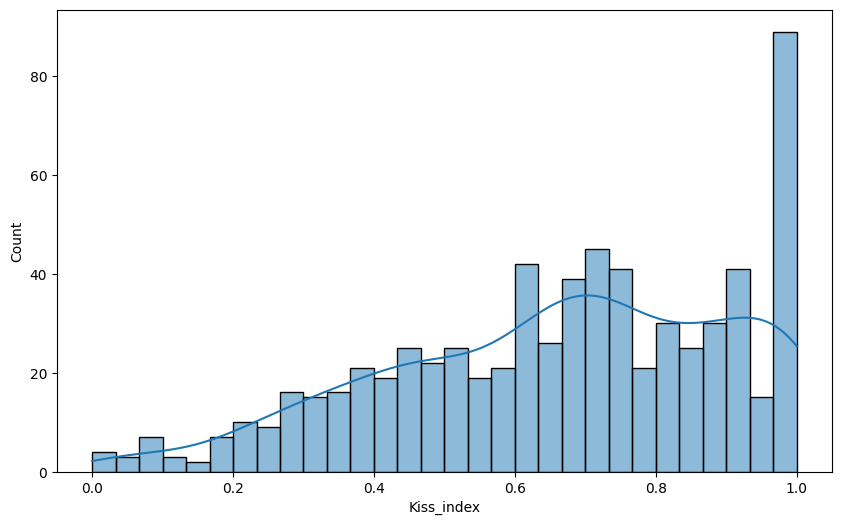

In [568]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['Kiss_index'], bins=30, kde=True, ax=ax)

# kiss_index is continuous, so we can use regression models
# kiss_index has range from 0 to 1

In [569]:
df.shape

(688, 45)

In [570]:
df_org.shape

(1406, 45)

In [573]:
df.to_csv(r"/Users/mexmex/Documents/3-Math_LU/HT2025/BERN02/BERNO2-kissing-challenge-2025/Data/train_cleaned.csv", index=False)

In [574]:
df_org.dropna().shape

(469, 45)